                                OLS Regression Results                               
Dep. Variable:     PromedioCalificacionAnual   R-squared:                       0.442
Model:                                   OLS   Adj. R-squared:                  0.436
Method:                        Least Squares   F-statistic:                     70.47
Date:                       Fri, 24 Nov 2023   Prob (F-statistic):           6.70e-13
Time:                               20:57:17   Log-Likelihood:                -64.786
No. Observations:                         91   AIC:                             133.6
Df Residuals:                             89   BIC:                             138.6
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

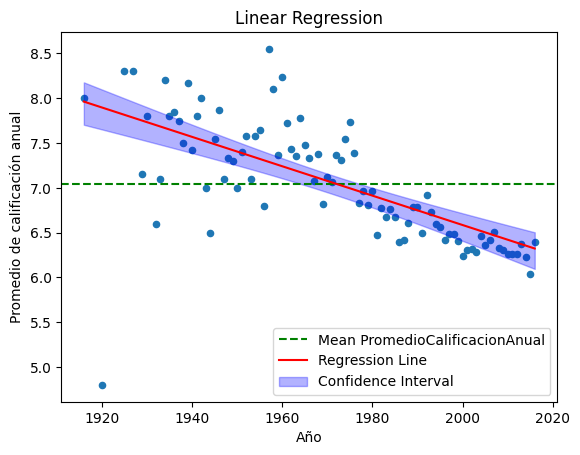

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

def linear_regression(df: pd.DataFrame, x: str, y: str, labelx, labely, title) -> None:
    # Ajuste de un modelo de regresión lineal
    model = sm.OLS(df[y], sm.add_constant(df[x])).fit()
    
    # Imprimir el resumen del modelo
    print(model.summary())
    
    # Extraer los coeficientes del resumen del modelo
    coef = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]['coef']
    
    # Calcular la media de la variable dependiente y
    y_mean = df[y].mean()
    
    # Gráfico de dispersión de los datos
    df.plot(x=x, y=y, kind='scatter')
    
    # Línea horizontal que representa la media de y
    plt.axhline(y_mean, color='green', linestyle='--', label=f'Mean {y}')
    
    # Línea de regresión
    plt.plot(df[x], coef.values[1] * df[x] + coef.values[0], color='red', label='Regression Line')
    
    # Predicciones y intervalo de confianza
    predictions = model.get_prediction()
    pred_conf = predictions.summary_frame(alpha=0.05)
    
    # Rellenar el área entre los límites del intervalo de confianza
    plt.fill_between(df[x], pred_conf['mean_ci_lower'], pred_conf['mean_ci_upper'], color='blue', alpha=0.3, label='Confidence Interval')
    
    # Etiquetas y título
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    
    # Mostrar la leyenda
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()

# Cargar el conjunto de datos
data = pd.read_csv('dataSet\MoviesDataSet.csv')

# Agrupación por año y cálculo del promedio de calificación anual
data_anio = data.groupby(['title_year']).agg(PromedioCalificacionAnual=('imdb_score', 'mean')).reset_index()
data_anio.reset_index(inplace=True)

# Llamar a la función de regresión lineal
linear_regression(data_anio, "title_year", "PromedioCalificacionAnual", 
                  "Año", "Promedio de calificación anual", "Linear Regression")

